# PROJECT FUTBIZZ (PART 1)
Our organization FUTBIZZ aims to  fulfils the role of a scouting agency and beyond , with our analysis we would like recommend replacements for different players in a team or addition players that would enchance the performance of the teams. We will also have a look at the potential future stars and market values of various players. With our data we would be able to get promising talents for a BARGAIN! 
# We will divide our project into 3 parts 
# Part 1)EDA and Analysis
# Part 2)Player Recommendation
# Part 3)Bid Prediciton

# EDA AND ANALYSIS

We will analyse the different aspects of the game starting from the height to a best team which consists of the best players in each position. we also try to find interesting insights which tell us about the football industry. These insights can be helpful for recommendation and predictions models to find accurate results.

### IMPORTING LIBRARIES

In [61]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
import warnings

CHECKING THE FILES AND IMPORTANT ASPECTS

In [1]:
df = pd.read_csv('FIFA19_data.csv')
df

<IPython.core.display.Javascript object>

Unnamed: 0      ID                Name  Age  \
0               0  158023            L. Messi   31   
1               1   20801   Cristiano Ronaldo   33   
2               2  190871           Neymar Jr   26   
3               3  193080              De Gea   27   
4               4  192985        K. De Bruyne   27   
...           ...     ...                 ...  ...   
18202       18202  238813        J. Lundstram   19   
18203       18203  243165  N. Christoffersson   19   
18204       18204  241638           B. Worman   16   
18205       18205  246268      D. Walker-Rice   17   
18206       18206  246269           G. Nugent   16   

                                                Photo Nationality  \
0      https://cdn.sofifa.org/players/4/19/158023.png   Argentina   
1       https://cdn.sofifa.org/players/4/19/20801.png    Portugal   
2      https://cdn.sofifa.org/players/4/19/190871.png      Brazil   
3      https://cdn.sofifa.org/players/4/19/193080.png       Spain   
4      https://cdn.sofifa.org/players/4/19/192985.png     Belgium   
...                                               ...         ...   
18202  https://cdn.sofifa.org/players/4/19/238813.png     England   
18203  https://cdn.sofifa.org/players/4/19/243165.png      Sweden   
18204  https://cdn.sofifa.org/players/4/19/241638.png     England   
18205  https://cdn.sofifa.org/players/4/19/246268.png     England   
18206  https://cdn.sofifa.org/players/4/19/246269.png     England   

                                      Flag  Overall  Potential  \
0      https://cdn.sofifa.org/flags/52.png       94         94   
1      https://cdn.sofifa.org/flags/38.png       94         94   
2      https://cdn.sofifa.org/flags/54.png       92         93   
3      https://cdn.sofifa.org/flags/45.png       91         93   
4       https://cdn.sofifa.org/flags/7.png       91         92   
...                                    ...      ...        ...   
18202  https://cdn.sofifa.org/flags/14.png       47         65   
18203  https://cdn.sofifa.org/flags/46.png       47         63   
18204  https://cdn.sofifa.org/flags/14.png       47         67   
18205  https://cdn.sofifa.org/flags/14.png       47         66   
18206  https://cdn.sofifa.org/flags/14.png       46         66   

                      Club  ... Composure Marking StandingTackle  \
0             FC Barcelona  ...      96.0    33.0           28.0   
1                 Juventus  ...      95.0    28.0           31.0   
2      Paris Saint-Germain  ...      94.0    27.0           24.0   
3        Manchester United  ...      68.0    15.0           21.0   
4          Manchester City  ...      88.0    68.0           58.0   
...                    ...  ...       ...     ...            ...   
18202      Crewe Alexandra  ...      45.0    40.0           48.0   
18203       Trelleborgs FF  ...      42.0    22.0           15.0   
18204     Cambridge United  ...      41.0    32.0           13.0   
18205      Tranmere Rovers  ...      46.0    20.0           25.0   
18206      Tranmere Rovers  ...      43.0    40.0           43.0   

       SlidingTackle GKDiving  GKHandling  GKKicking  GKPositioning  \
0               26.0      6.0        11.0       15.0           14.0   
1               23.0      7.0        11.0       15.0           14.0   
2               33.0      9.0         9.0       15.0           15.0   
3               13.0     90.0        85.0       87.0           88.0   
4               51.0     15.0        13.0        5.0           10.0   
...              ...      ...         ...        ...            ...   
18202           47.0     10.0        13.0        7.0            8.0   
18203           19.0     10.0         9.0        9.0            5.0   
18204           11.0      6.0         5.0       10.0            6.0   
18205           27.0     14.0         6.0       14.0            8.0   
18206           50.0     10.0        15.0        9.0           12.0   

      GKReflexes Release Clause  
0            8.0        €226.5M 

In [2]:
df.shape

(18207, 89)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
Unnamed: 0                  18207 non-null int64
ID                          18207 non-null int64
Name                        18207 non-null object
Age                         18207 non-null int64
Photo                       18207 non-null object
Nationality                 18207 non-null object
Flag                        18207 non-null object
Overall                     18207 non-null int64
Potential                   18207 non-null int64
Club                        17966 non-null object
Club Logo                   18207 non-null object
Value                       18207 non-null object
Wage                        18207 non-null object
Special                     18207 non-null int64
Preferred Foot              18159 non-null object
International Reputation    18159 non-null float64
Weak Foot                   18159 non-null float64
Skill Moves                 18159 non-null fl

In [4]:
df.isnull().sum()

Unnamed: 0           0
ID                   0
Name                 0
Age                  0
Photo                0
                  ... 
GKHandling          48
GKKicking           48
GKPositioning       48
GKReflexes          48
Release Clause    1564
Length: 89, dtype: int64

### CHECKING NULL VALUES

In [5]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Values by column')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1, 'Missing Values by column')

### TREATING NULL VALUES

In [6]:
df.drop('Unnamed: 0', axis=1, inplace=True)

In [7]:
df['ShortPassing'].fillna(df['ShortPassing'].mean(), inplace = True)
df['Volleys'].fillna(df['Volleys'].mean(), inplace = True)
df['Dribbling'].fillna(df['Dribbling'].mean(), inplace = True)
df['Curve'].fillna(df['Curve'].mean(), inplace = True)
df['FKAccuracy'].fillna(df['FKAccuracy'], inplace = True)
df['LongPassing'].fillna(df['LongPassing'].mean(), inplace = True)
df['BallControl'].fillna(df['BallControl'].mean(), inplace = True)
df['HeadingAccuracy'].fillna(df['HeadingAccuracy'].mean(), inplace = True)
df['Finishing'].fillna(df['Finishing'].mean(), inplace = True)
df['Crossing'].fillna(df['Crossing'].mean(), inplace = True)
df['Weight'].fillna('200lbs', inplace = True)
df['Contract Valid Until'].fillna(2019, inplace = True)
df['Height'].fillna("5'11", inplace = True)
df['Loaned From'].fillna('None', inplace = True)
df['Joined'].fillna('Jul 1, 2018', inplace = True)
df['Jersey Number'].fillna(8, inplace = True)
df['Body Type'].fillna('Normal', inplace = True)
df['Position'].fillna('ST', inplace = True)
df['Club'].fillna('No Club', inplace = True)
df['Work Rate'].fillna('Medium/ Medium', inplace = True)
df['Skill Moves'].fillna(df['Skill Moves'].median(), inplace = True)
df['Weak Foot'].fillna(3, inplace = True)
df['Preferred Foot'].fillna('Right', inplace = True)
df['International Reputation'].fillna(1, inplace = True)
df['Wage'].fillna('€200K', inplace = True)

In [8]:
df.fillna(0, inplace = True)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1, 'Missing Values by column')

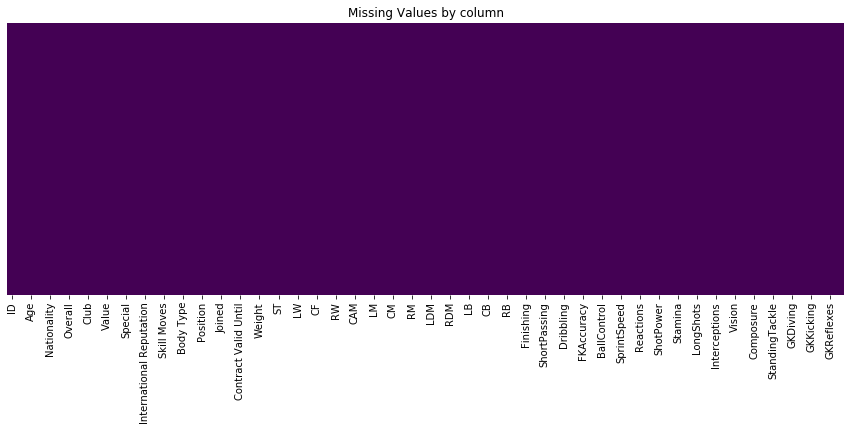

In [9]:
plt.figure(figsize=(15,5))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')
plt.title('Missing Values by column')

### THERE ARE SOME INDIAN PLAYERS IN FIFA TOO!

In [10]:
def country(x):
    return df[df['Nationality'] == x].head()


# prepare dataset for Indian players
country('India')


ID             Name  Age  \
8605   190939       S. Chhetri   33   
10011  223763       S. Jhingan   24   
12598  217225    J. Lalpekhlua   27   
12811  225213  G. Singh Sandhu   26   
13508  238205    A. Edathodika   31   

                                                Photo Nationality  \
8605   https://cdn.sofifa.org/players/4/19/190939.png       India   
10011  https://cdn.sofifa.org/players/4/19/223763.png       India   
12598  https://cdn.sofifa.org/players/4/19/217225.png       India   
12811  https://cdn.sofifa.org/players/4/19/225213.png       India   
13508  https://cdn.sofifa.org/players/4/19/238205.png       India   

                                       Flag  Overall  Potential     Club  \
8605   https://cdn.sofifa.org/flags/159.png       67         67  No Club   
10011  https://cdn.sofifa.org/flags/159.png       65         71  No Club   
12598  https://cdn.sofifa.org/flags/159.png       63         64  No Club   
12811  https://cdn.sofifa.org/flags/159.png       63         68  No Club   
13508  https://cdn.sofifa.org/flags/159.png       62         62  No Club   

                                  Club Logo  ... Composure Marking  \
8605   https://cdn.sofifa.org/flags/159.png  ...      67.0    30.0   
10011  https://cdn.sofifa.org/flags/159.png  ...      64.0    64.0   
12598  https://cdn.sofifa.org/flags/159.png  ...      47.0    28.0   
12811  https://cdn.sofifa.org/flags/159.png  ...      57.0    19.0   
13508  https://cdn.sofifa.org/flags/159.png  ...      49.0    67.0   

       StandingTackle SlidingTackle  GKDiving  GKHandling  GKKicking  \
8605             24.0          44.0      10.0         7.0       11.0   
10011            61.0          60.0      13.0        11.0        7.0   
12598            31.0          29.0      13.0        11.0       10.0   
12811            15.0          11.0      63.0        59.0       59.0   
13508            62.0          68.0      14.0        15.0       14.0   

      GKPositioning GKReflexes Release Clause  
8605            9.0       10.0              0  
10011          11.0       12.0              0  
12598          10.0       11.0              0  
12811          62.0       64.0              0  
13508          11.0        7.0              0  

[5 rows x 88 columns]

In [11]:
def parse_ht(ht):
    # format: 7'0
    ht_ = ht.split("'")
    ft_ = int(ht_[0])
    in_ = int(ht_[1])
    return round(((12*ft_) + in_)*2.54) 
  
df['Height'] = df['Height'].apply(lambda x:parse_ht(x))

In [12]:
def parse_hta(ht):
    # format: 7'0
    ht_ = ht.split("lbs")
    wt_ = int(ht_[0])
    return round((wt_/2.20462)) 
df['Weight'] = df['Weight'].apply(lambda x:parse_hta(x))

### CHECKING THE COUNT BASED ON THE HEIGHT OF PLAYERS 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

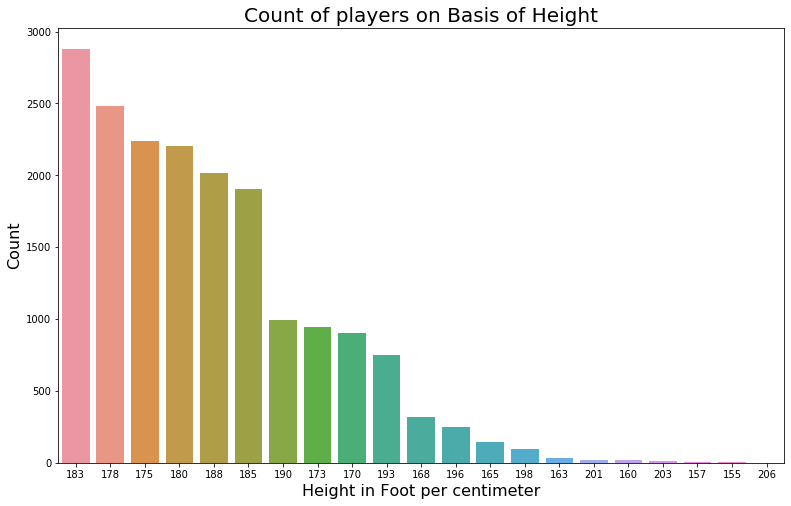

In [13]:
# Height of Players
data=df.copy()
plt.figure(figsize = (13, 8))
ax = sns.countplot(x = 'Height', data = data,order =df['Height'].value_counts().index)
ax.set_title(label = 'Count of players on Basis of Height', fontsize = 20)
ax.set_xlabel(xlabel = 'Height in Foot per centimeter', fontsize = 16)
ax.set_ylabel(ylabel = 'Count', fontsize = 16)
plt.show()

### CHECKING THE COUNT BASED ON WEIGHT OF THE PLAYERS

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

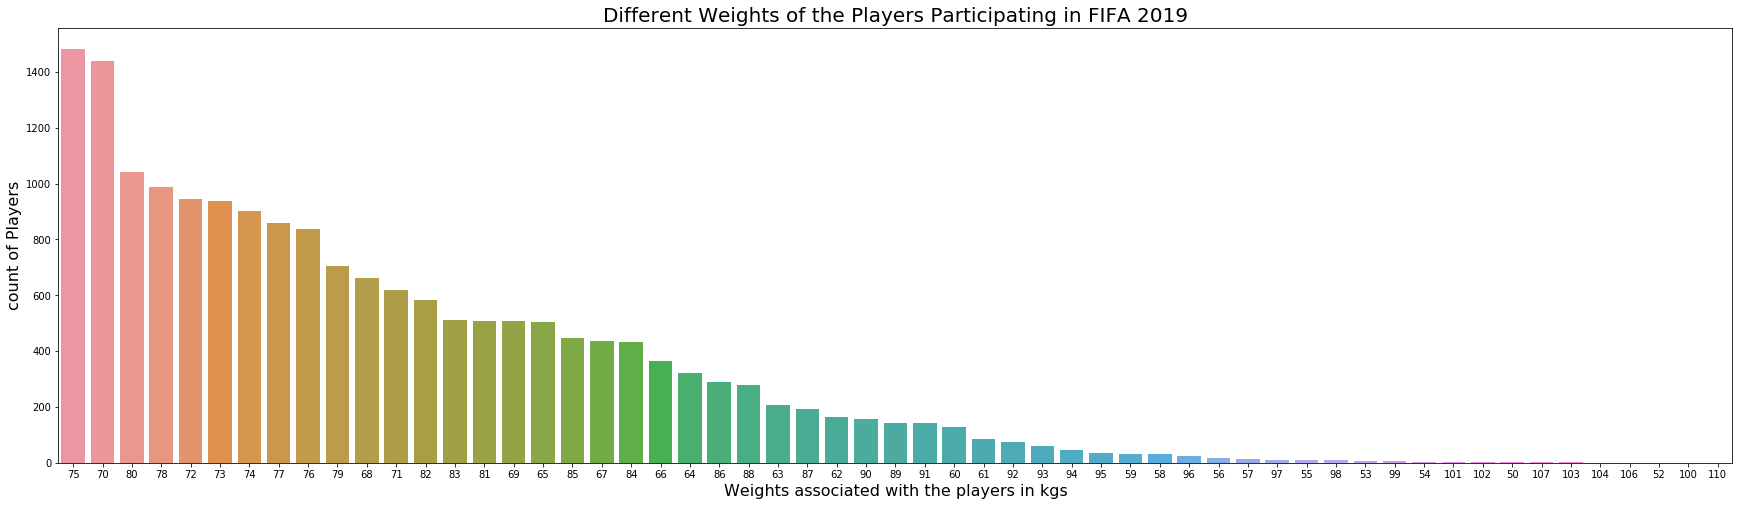

In [14]:
# To show Different body weight of the players participating in the FIFA 2019

plt.figure(figsize = (30, 8))
sns.countplot(x = 'Weight', data = data,order =df['Weight'].value_counts().index)
plt.title('Different Weights of the Players Participating in FIFA 2019', fontsize = 20)
plt.xlabel('Weights associated with the players in kgs', fontsize = 16)
plt.ylabel('count of Players', fontsize = 16)
plt.show()

### CHECKING THE COUNT BASED ON PREFERRED FOOT 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

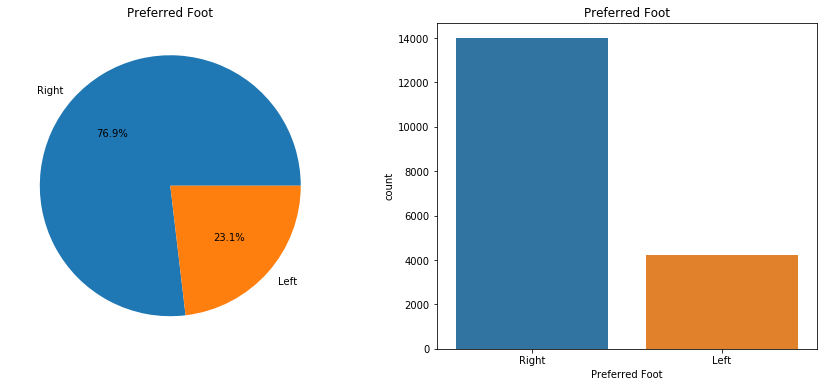

In [15]:
  
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(15, 6))
    df[col].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], shadow=False)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    sns.countplot(col, data=df, ax=ax[1],order =df[col].value_counts().index)
    ax[1].set_title(col)
    plt.show()

piecount('Preferred Foot')

### CHECKING THE COUNT BASED ON WEAK FOOT AND PREFERRED FOOT

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

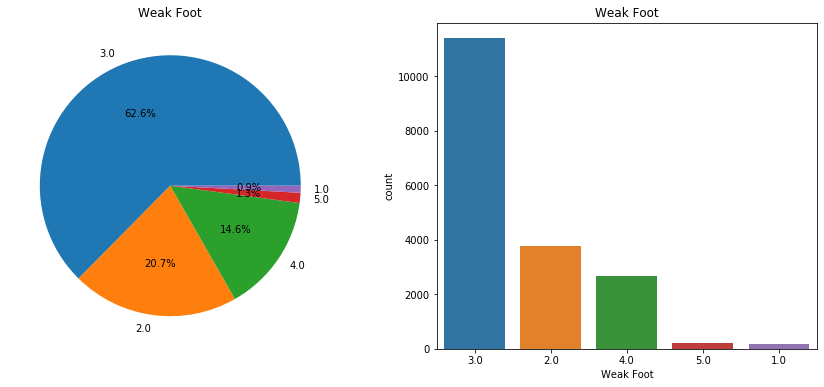

In [16]:
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(15, 6))
    df[col].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], shadow=False)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    sns.countplot(col, data=df, ax=ax[1],order =df[col].value_counts().index)
    ax[1].set_title(col)
    plt.show()

piecount('Weak Foot')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

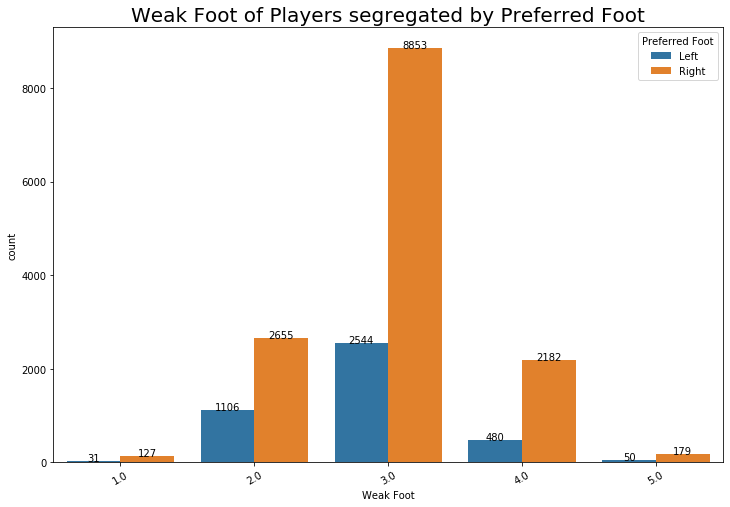

In [17]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Weak Foot'], data=df, hue='Preferred Foot',)
graph.set_title('Weak Foot of Players segregated by Preferred Foot'  , fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

### CHECKING THE COUNT BASED ON POSITIONS AND PREFERRED FOOT

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

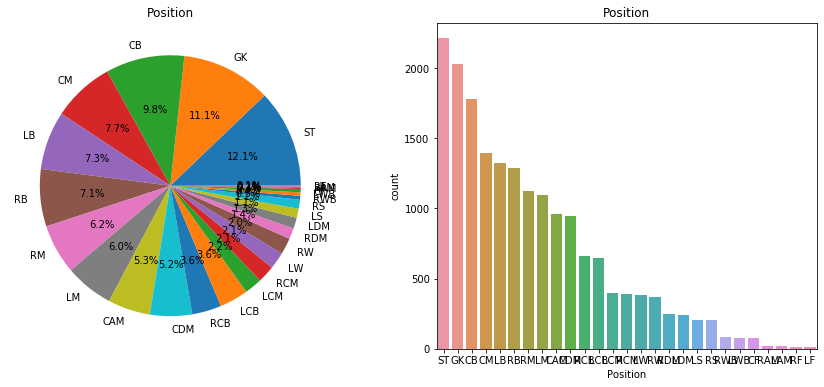

In [18]:
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(15, 6))
    df[col].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], shadow=False)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    sns.countplot(col, data=df, ax=ax[1],order =df[col].value_counts().index)
    ax[1].set_title(col)
    plt.show()

piecount('Position')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

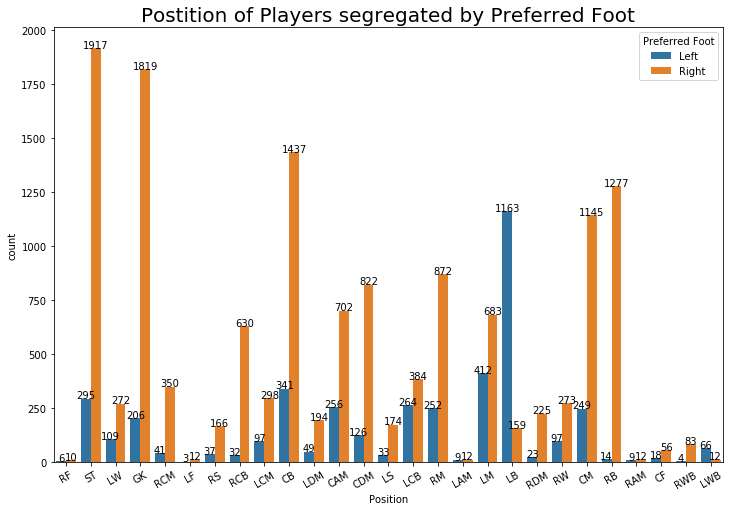

In [19]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Position'], data=df, hue='Preferred Foot',)
graph.set_title('Postition of Players segregated by Preferred Foot'  , fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

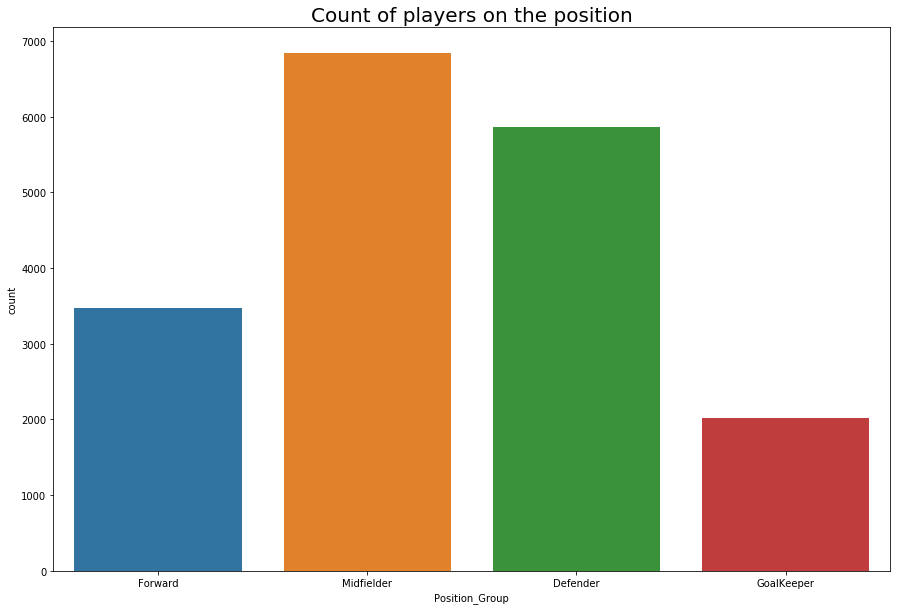

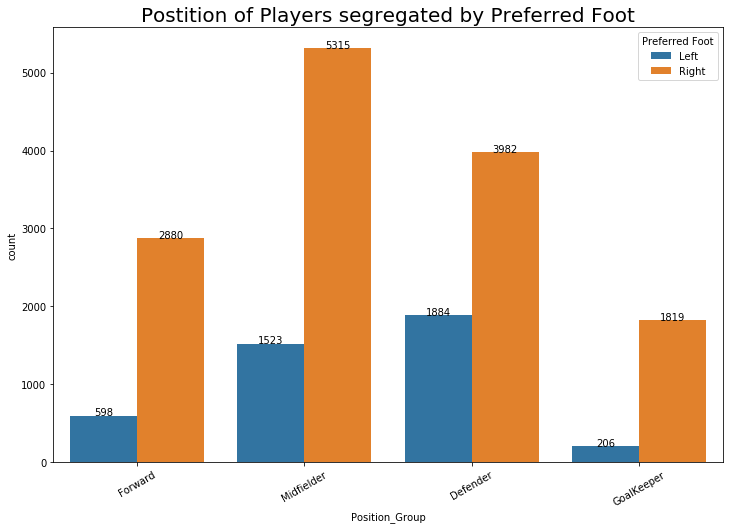

In [20]:
data=df.copy()
#Define position groups
forwards = ['RF', 'ST', 'LW','LF', 'RS', 'LS', 'RW', 'CF' ]
defenders = ['RCB','CB', 'LCB', 'LB', 'RB', 'RWB', 'LWB']
mids = ['RCM', 'LCM', 'LDM', 'CAM', 'CDM', 'RM', 'LAM', 'LM', 'RDM', 'CM', 'RAM']
gk = ['GK']

#Create Function to apply to df
def label_position(row):
    if row['Position'] in forwards:
        return 'Forward'
    if row['Position'] in defenders:
        return 'Defender'
    if row['Position'] in mids:
        return 'Midfielder'
    if row['Position'] in gk:
        return 'GoalKeeper'
    return 'Other'

#Create Position_group column of 4 Main positions
data['Position_Group'] = data.apply(lambda row: label_position(row), axis = 1)

#Turn it into categorical variable 
data['Position_Group'] = data['Position_Group'].astype('category')

# All of position
f, ax = plt.subplots(figsize=(15, 10))

ax = sns.countplot(x = 'Position_Group', data = data,
                   order = ['Forward', 'Midfielder', 'Defender', 'GoalKeeper'])

ax.set_title(label='Count of players on the position', fontsize=20);



fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x = data['Position_Group'], data=data, hue='Preferred Foot', order = ['Forward', 'Midfielder', 'Defender', 'GoalKeeper'])
graph.set_title('Postition of Players segregated by Preferred Foot'  , fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

### CHECKING THE COUNT BASED ON SKILL MOVES AND PREFERRED FOOT

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

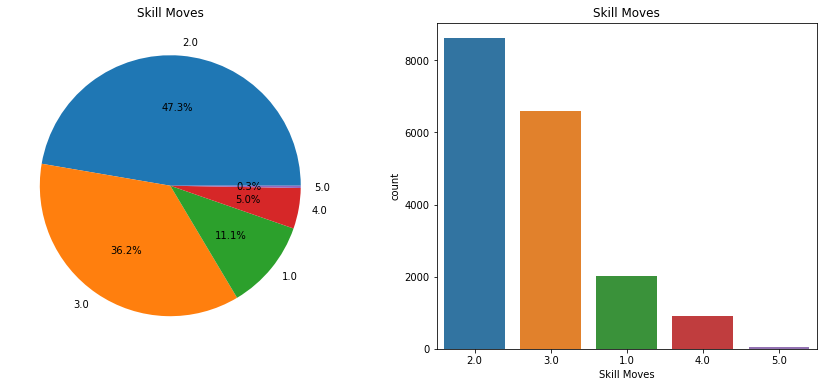

In [21]:
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(15, 6))
    df[col].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], shadow=False)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    sns.countplot(col, data=df, ax=ax[1],order =df[col].value_counts().index)
    ax[1].set_title(col)
    plt.show()

piecount('Skill Moves')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

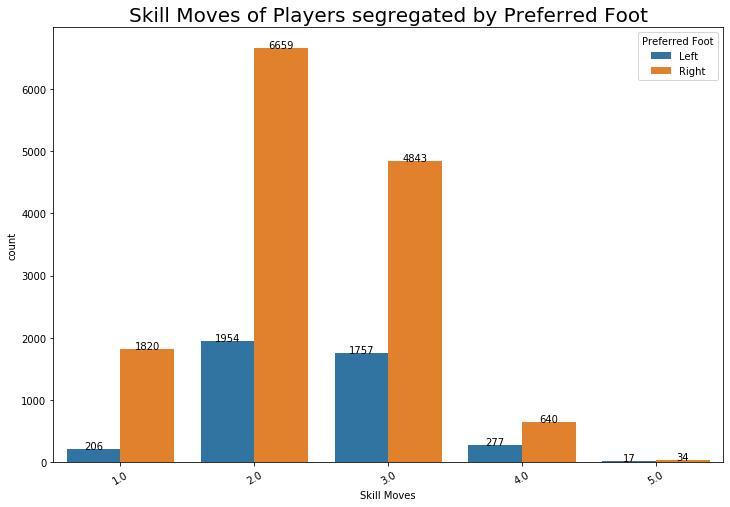

In [22]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Skill Moves'], data=df, hue='Preferred Foot',)
graph.set_title('Skill Moves of Players segregated by Preferred Foot'  , fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

### CHECKING THE COUNT BASED ON WORK RATE AND PREFERRED FOOT

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

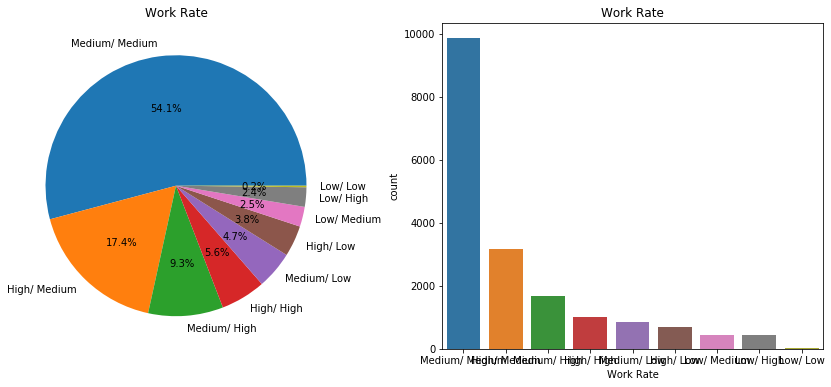

In [23]:
def piecount(col):
    f, ax = plt.subplots(1, 2, figsize=(15, 6))
    df[col].value_counts().plot.pie( autopct='%1.1f%%', ax=ax[0], shadow=False)
    ax[0].set_title(col)
    ax[0].set_ylabel('')
    sns.countplot(col, data=df, ax=ax[1],order =df[col].value_counts().index)
    ax[1].set_title(col)
    plt.show()

piecount('Work Rate')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

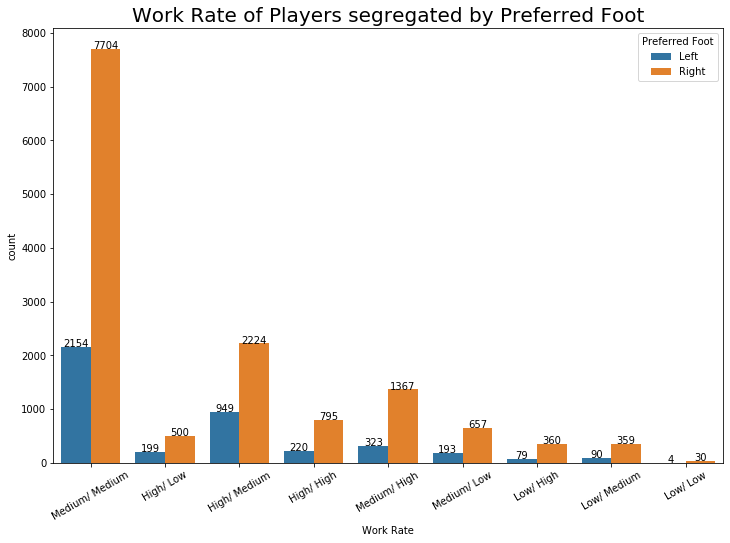

In [24]:
fig, ax = plt.subplots(figsize=(12,8))
graph = sns.countplot(ax=ax,x=df['Work Rate'], data=df, hue='Preferred Foot')
graph.set_title('Work Rate of Players segregated by Preferred Foot'  , fontsize = 20)
graph.set_xticklabels(graph.get_xticklabels(), rotation=30)
for p in graph.patches:
    height = p.get_height()
    graph.text(p.get_x()+p.get_width()/2., height + 0.1,height ,ha="center")

### CHECKING THE COUNT BASED ON AGE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean Age =  25.12
Median Age =  25.0
SD Age =  4.67


<IPython.core.display.Javascript object>

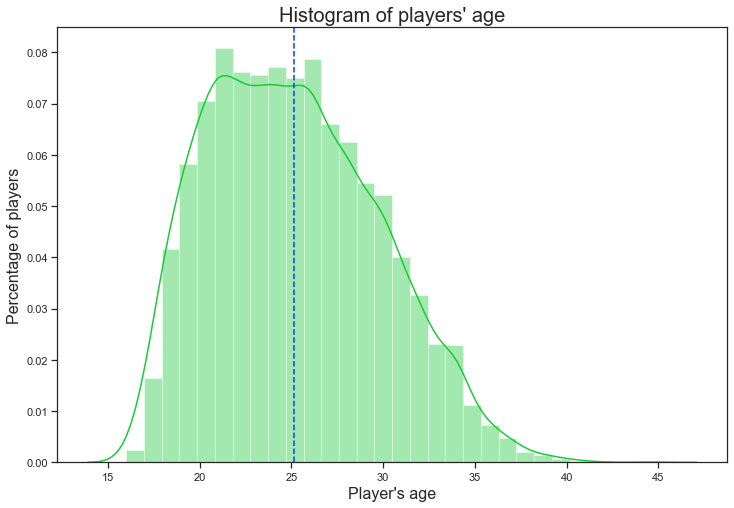

In [25]:
# Histogram: number of players's age
sns.set(style ="ticks", palette = 'bright', color_codes=True)

x = data.Age
plt.figure(figsize=(12,8))
ax = sns.distplot(x, bins = 30, kde = True, color='g')
ax.set_xlabel(xlabel="Player\'s age", fontsize=16)
ax.set_ylabel(ylabel='Percentage of players', fontsize=16)
ax.set_title(label="Histogram of players' age", fontsize=20)

plt.axvline(x =data['Age'].mean(), ymin = 0, ymax = 1, linestyle = '--')

#Add legend for mean line

print('Mean Age = ', round(data['Age'].mean(),2))
print('Median Age = ', round(data['Age'].median(),2))
print('SD Age = ', round(data['Age'].std(),2))


plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

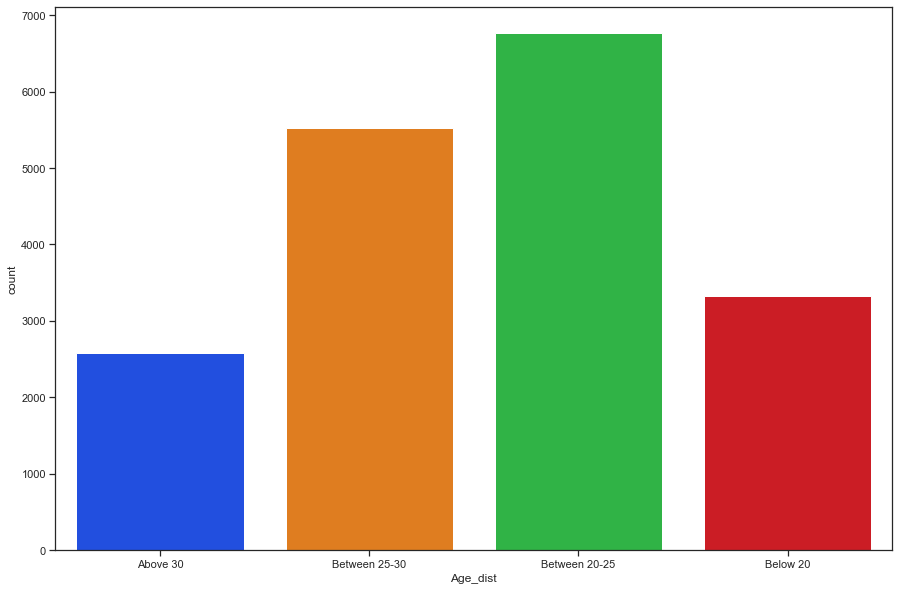

In [26]:
data=df.copy()
def age_d(x):
    if x>30:
        return 'Above 30'
    if x<=30 and x>25:
        return 'Between 25-30'
    if x<=25 and x>20:
        return 'Between 20-25'
    else:
        return 'Below 20'
        
data['Age_dist']=data.Age.apply(age_d)
plt.figure(figsize=(15,10))
sns.countplot(data['Age_dist'])

### CHECKING THE COUNT BASED ON AGE, POTENTIAL AND OVERALL

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean Overall =  66.24
Median Overall =  66.0
SD Overall =  6.91


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

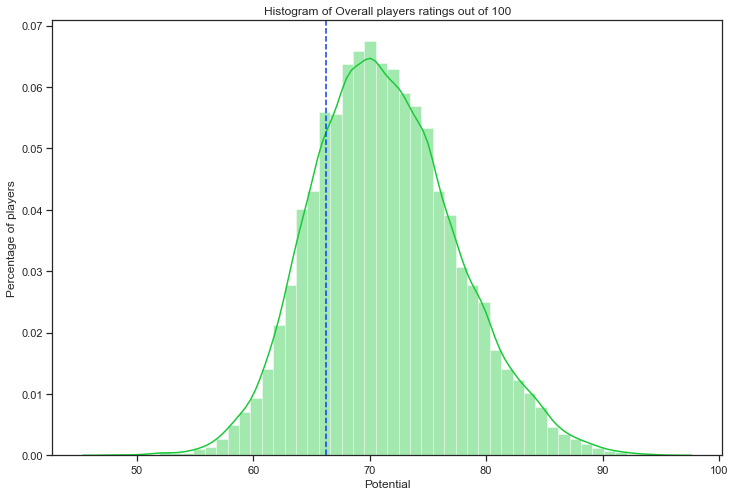

In [27]:
plt.figure(figsize = (12,8))
ax = sns.distplot(data['Potential'], bins = 48, kde = True, color = 'g')


ax.set_ylabel(ylabel='Percentage of players', fontsize=12)


plt.axvline(x =data['Overall'].mean(), ymin = 0, ymax = 1, linestyle = '--')

print('Mean Overall = ', round(data['Overall'].mean(),2))
print('Median Overall = ', round(data['Overall'].median(),2))
print('SD Overall = ', round(data['Overall'].std(),2))


plt.title('Histogram of Overall players ratings out of 100')
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Mean Overall =  66.24
Median Overall =  66.0
SD Overall =  6.91


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

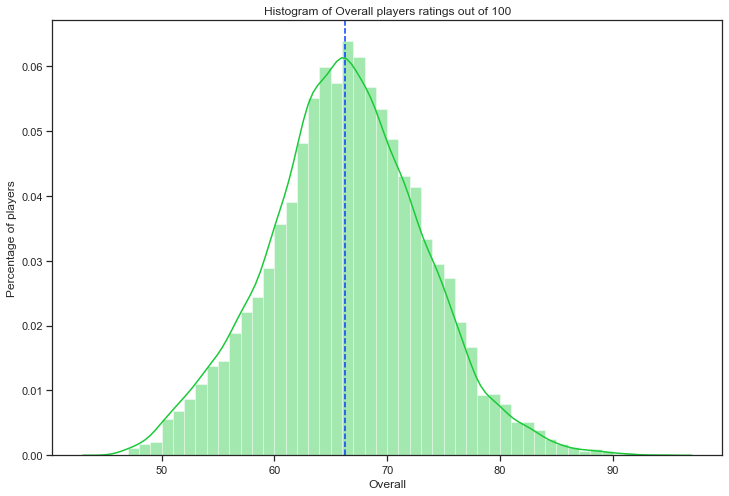

In [28]:
plt.figure(figsize = (12,8))
ax = sns.distplot(data['Overall'], bins = 48, kde = True, color = 'g')


ax.set_ylabel(ylabel='Percentage of players', fontsize=12)


plt.axvline(x =data['Overall'].mean(), ymin = 0, ymax = 1, linestyle = '--')

print('Mean Overall = ', round(data['Overall'].mean(),2))
print('Median Overall = ', round(data['Overall'].median(),2))
print('SD Overall = ', round(data['Overall'].std(),2))


plt.title('Histogram of Overall players ratings out of 100')
plt.show()

It’s clear that most players are between 21–26 years old. It’s reasonable as this age group is the best years of athletes. Players younger than that may not have the enough skills and experiences and also may not have the chance to prove themself on the football field yet. Players elder than 30 may already retire from the football filed. Thus the number for players elder than 30 drops with the growth of age.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

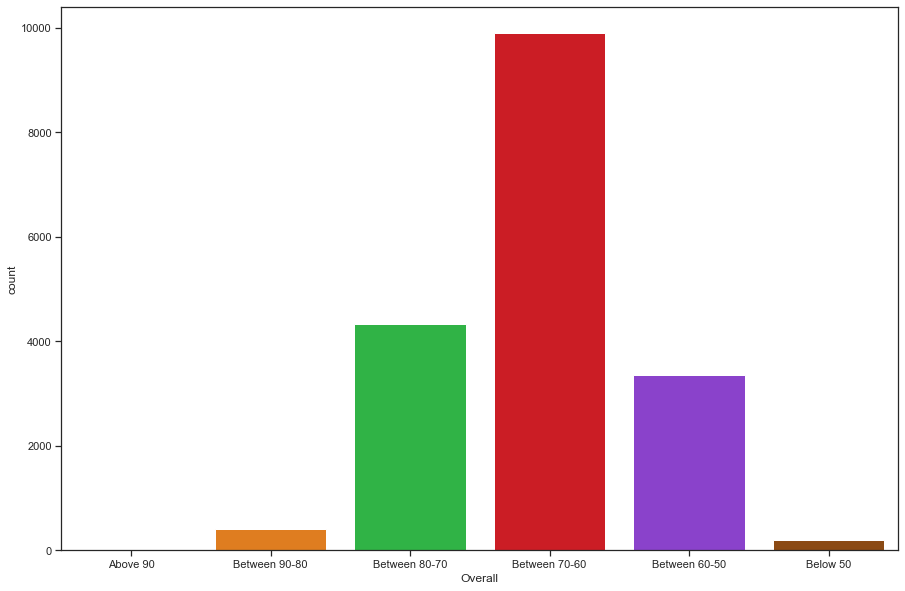

In [29]:
def overall_d(x):
    if x>90:
        return 'Above 90'
    if x<=90 and x>80:
        return 'Between 90-80'
    if x<=80 and x>70:
        return 'Between 80-70'
    if x<=70 and x>60:
        return 'Between 70-60'
    if x<=60 and x>50:
        return 'Between 60-50'
    else:
        return 'Below 50'
    
data.Overall=data.Overall.apply(overall_d)
plt.figure(figsize=(15,10))
sns.countplot(data['Overall'])

<IPython.core.display.Javascript object>

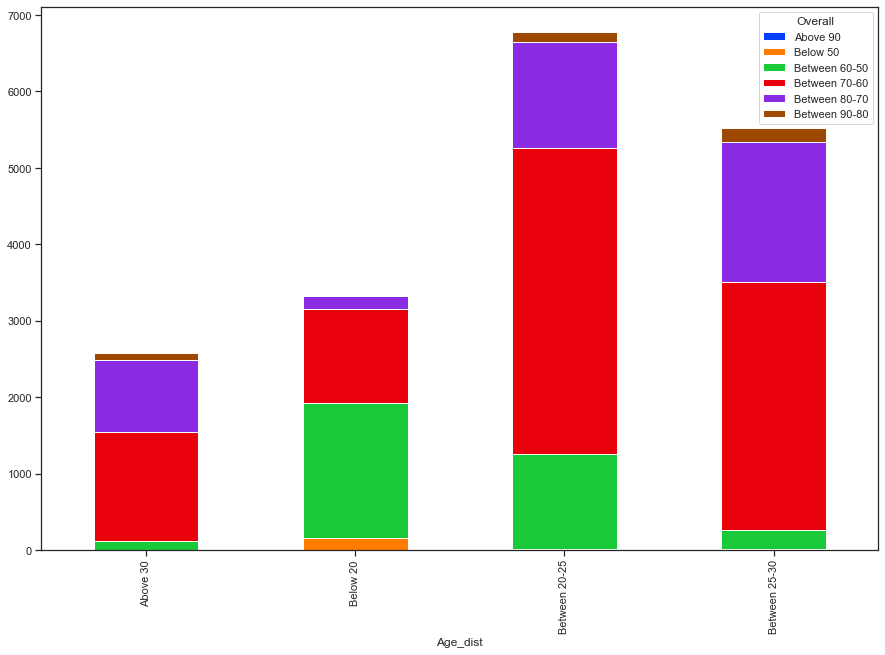

In [30]:
crosstab=pd.crosstab(data['Age_dist'],data['Overall'])
crosstab.plot.bar(stacked=True,figsize=(15,10))

<IPython.core.display.Javascript object>

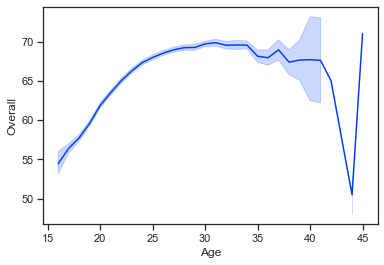

In [31]:
sns.lineplot(x=df["Age"], y=df["Overall"], data=data)

Players reach their peak level at low thirties and then decline.

### CHECKING THE COUNT BASED ON DIFFERNT COUNTRIES

In [32]:
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode,iplot
import plotly.express as px
countries=df.Nationality.value_counts()
f= go.Figure(data=go.Choropleth(
    locations=countries.index,
    z =countries, 
    locationmode = 'country names', 
    colorscale =px.colors.sequential.Plasma,
    colorbar_title = "NO. of players",
))

f.update_layout(
    title_text = 'Number of players from each country',
)
iplot(f)

In [33]:
print('Total number of countries : {0}'.format(df['Nationality'].nunique()))
print(df['Nationality'].value_counts().head(5))

Total number of countries : 164
England      1662
Germany      1198
Spain        1072
Argentina     937
France        914
Name: Nationality, dtype: int64


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

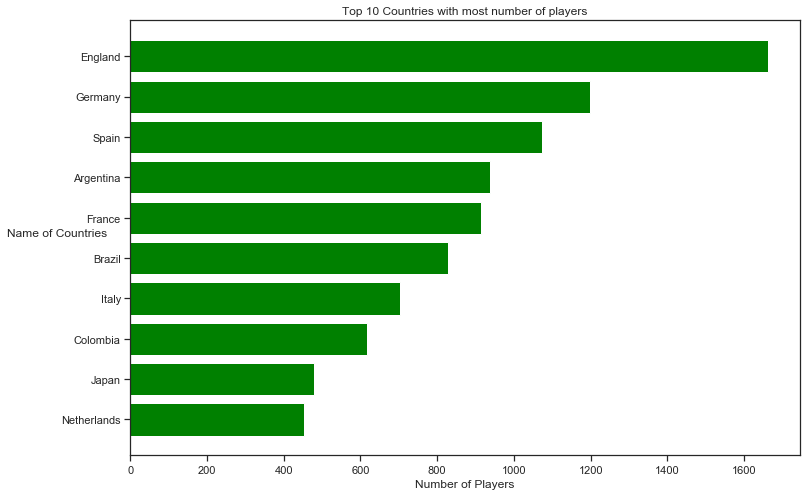

In [34]:
top_countries = df['Nationality'].value_counts().head(10)
fig, ax = plt.subplots(figsize=(12,8))
x = top_countries.values
y = top_countries.index
ax.barh(y, x, align='center', color='green')
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Number of Players')
ax.set_ylabel('Name of Countries', rotation=0)
ax.set_title('Top 10 Countries with most number of players')
plt.show()

### CHECKING THE AGE BASED ON NATIONALITY

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

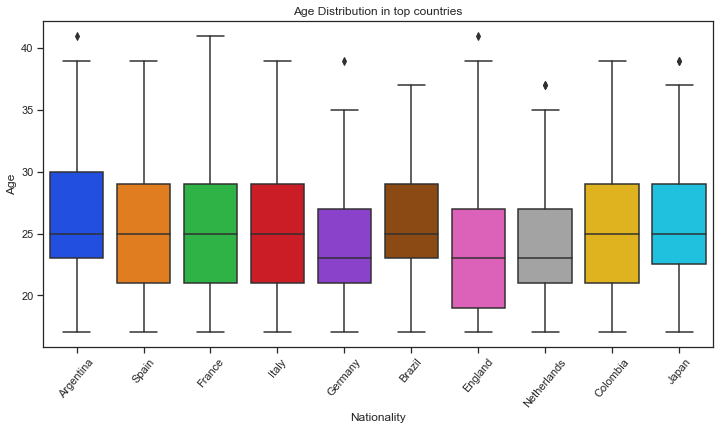

In [35]:
top_countries_name = top_countries.index
df_country_age = df.loc[df['Nationality'].isin(top_countries_name) & df['Age']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Nationality' , y = 'Age' , data = df_country_age)
plt.title('Age Distribution in top countries')
plt.xticks(rotation = 50)
plt.show()

### CHECKING THE OVERALL BASED ON NATIONALITY

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

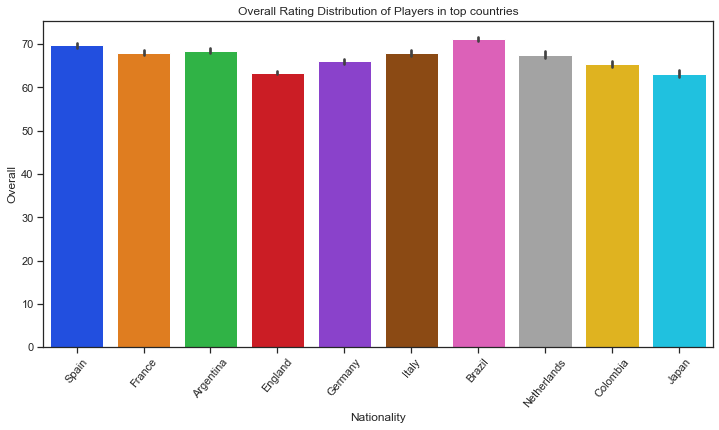

In [36]:
df_country_rating = df.loc[df['Nationality'].isin(top_countries_name) & df['Overall']]
plt.figure(1 , figsize = (12,6))
sns.barplot(x = 'Nationality' , y = 'Overall' , data = df_country_rating)
plt.title('Overall Rating Distribution of Players in top countries')
plt.xticks(rotation = 50)
plt.show()

### CHECKING THE POTENTIAL BASED ON NATIONALITY

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

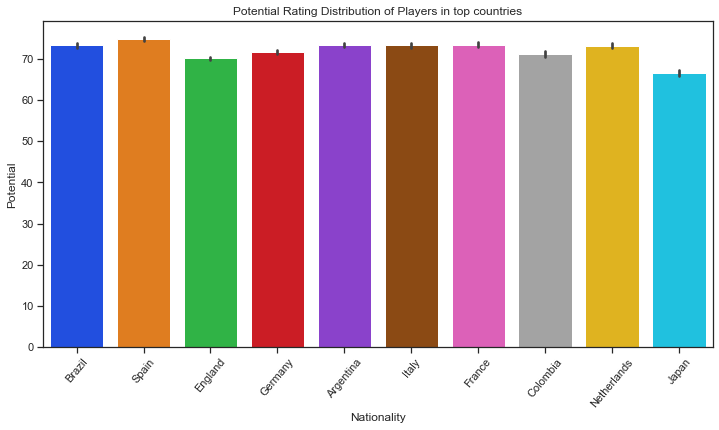

In [37]:
df_country_rating = df.loc[df['Nationality'].isin(top_countries_name) & df['Potential']]
plt.figure(1 , figsize = (12,6))
sns.barplot(x = 'Nationality' , y = 'Potential' , data = df_country_rating)
plt.title('Potential Rating Distribution of Players in top countries')
plt.xticks(rotation = 50)
plt.show()

In [38]:
print('Total number of clubs : {0}'.format(df['Club'].nunique()))
print(df['Club'].value_counts().head(5))

Total number of clubs : 652
No Club                241
RC Celta                33
Eintracht Frankfurt     33
CD Leganés              33
Chelsea                 33
Name: Club, dtype: int64


### CHECKING THE AGE BASED ON CLUBS

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

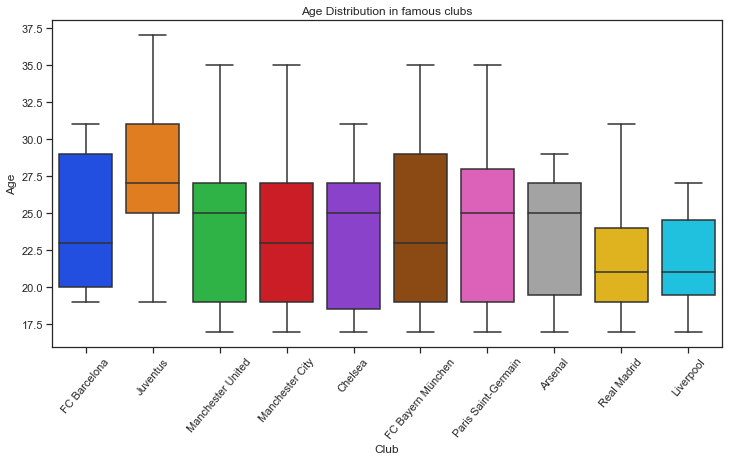

In [39]:
#famous clubs
clubs = ['FC Barcelona','Real Madrid','Juventus','Liverpool','Manchester United',
         'Chelsea','Arsenal','Paris Saint-Germain' ,'FC Bayern München','Manchester City']
df_club_age = df.loc[df['Club'].isin(clubs) & df['Age']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Club', y = 'Age' , data = df_club_age)
plt.title('Age Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

### CHECKING THE OVERALL BASED ON CLUBS

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

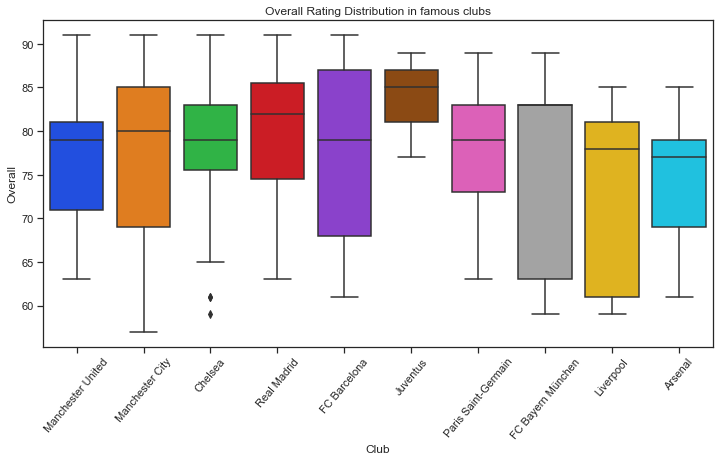

In [40]:
df_club_rating = df.loc[df['Club'].isin(clubs) & df['Overall']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Club' , y = 'Overall' , data = df_club_rating,)
plt.title('Overall Rating Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

### CHECKING THE CORRELATION BETWEEN DIFFERENT FEATURES 

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

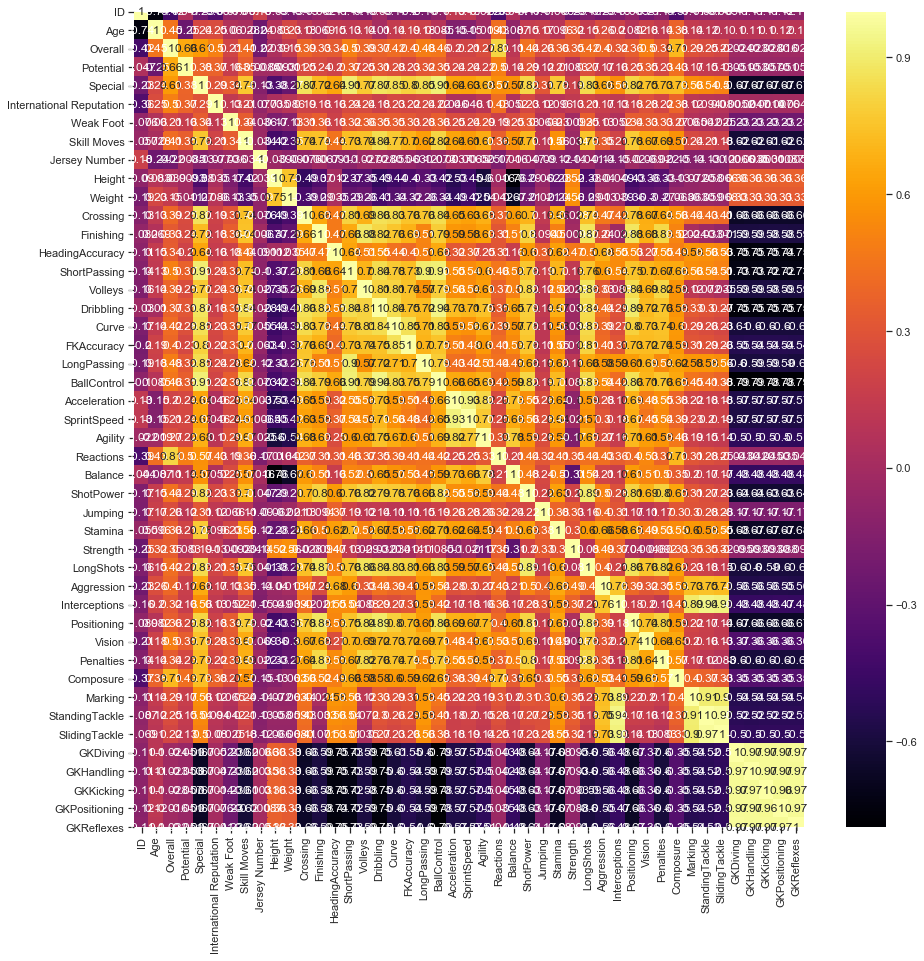

In [41]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr(),annot=True,cmap='inferno')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

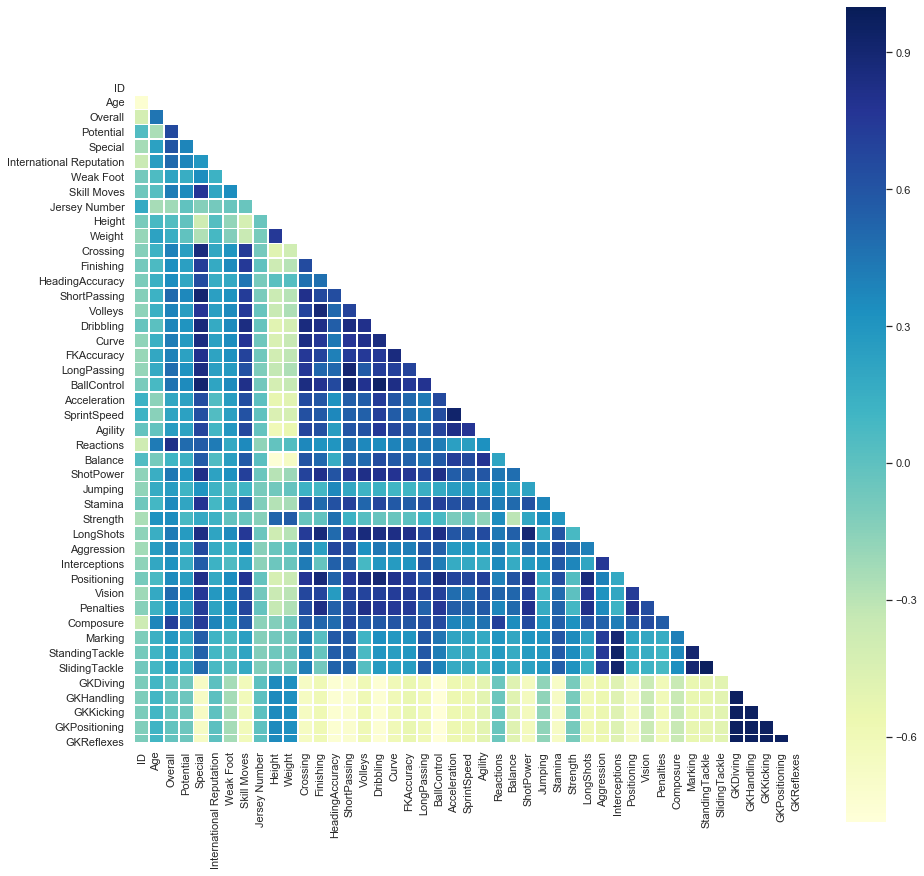

In [42]:
corr = df.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(15, 15))
    ax = sns.heatmap(corr,mask=mask,square=True,linewidths=.8,cmap="YlGnBu")



### CONVERTING THE WAGES, VALUE AND RELEASE CLAUSE AND DOING SOME ANALYSIS

In [43]:
def normalizing_wage(x):
    if '€' in str(x) and 'M' in str(x):
        c = str(x).replace('€' , '')
        c = str(c).replace('M' , '')
        c = float(c) * 1000000

    else:
        c = str(x).replace('€' , '')
        c = str(c).replace('K' , '')
        c = float(c) * 1000

    return c

df['Normalized_Wage'] = df['Wage'].apply(lambda x : normalizing_wage(x))
df.sort_values(by = 'Normalized_Wage' , ascending = False)[['Name','Club','Nationality','Overall',
'Age','Normalized_Wage','Wage']].head(5)

Name          Club Nationality  Overall  Age  Normalized_Wage  \
0           L. Messi  FC Barcelona   Argentina       94   31         565000.0   
7          L. Suárez  FC Barcelona     Uruguay       91   31         455000.0   
6          L. Modrić   Real Madrid     Croatia       91   32         420000.0   
1  Cristiano Ronaldo      Juventus    Portugal       94   33         405000.0   
8       Sergio Ramos   Real Madrid       Spain       91   32         380000.0   

    Wage  
0  €565K  
7  €455K  
6  €420K  
1  €405K  
8  €380K

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

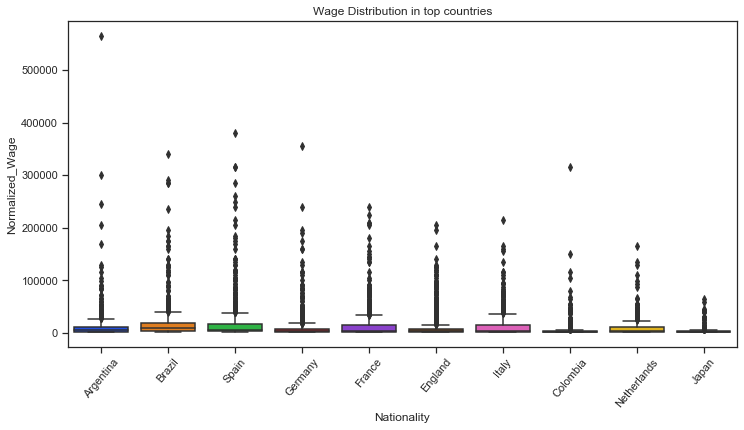

In [44]:
# Every Nations' Player and their wages

df_country_age = df.loc[data['Nationality'].isin(top_countries_name) & df['Normalized_Wage']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x='Nationality' ,y='Normalized_Wage' , data = df_country_age)
plt.title('Wage Distribution in top countries')
plt.xticks(rotation = 50)
plt.show()

we can see that players in argentina,braziland european countries have higher wages than usual this is because most of them star players like messi , neymar and ramos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

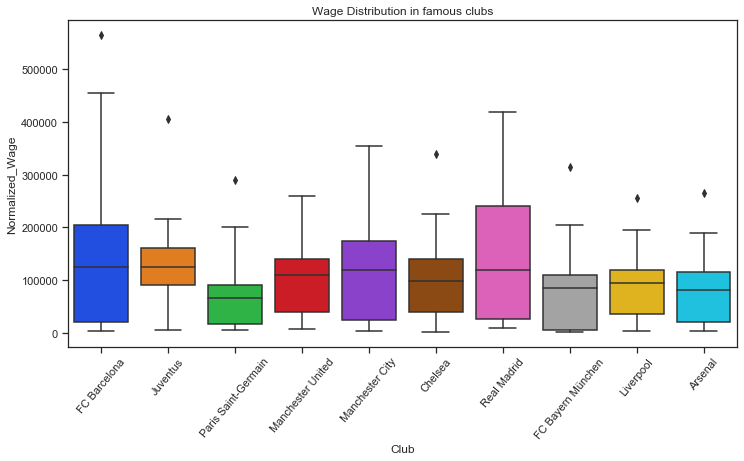

In [45]:
df_club_age = df.loc[df['Club'].isin(clubs) & df['Normalized_Wage']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Club', y = 'Normalized_Wage' , data = df_club_age)
plt.title('Wage Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

we can see one player in barcelona has higher wages than usual and it is the one and only MESSI.

In [46]:
def normalizing_value(x):
    if '€' in str(x) and 'M' in str(x):
        c = str(x).replace('€' , '')
        c = str(c).replace('M' , '')
        c = float(c) * 1000000

    else:
        c = str(x).replace('€' , '')
        c = str(c).replace('K' , '')
        c = float(c) * 1000

    return c

df['Normalized_value'] = df['Value'].apply(lambda x : normalizing_value(x))
df.sort_values(by = 'Normalized_value' , ascending = False)[['Name','Club','Nationality','Overall',
'Age','Normalized_value','Value']].head(5)

Name                 Club Nationality  Overall  Age  \
2      Neymar Jr  Paris Saint-Germain      Brazil       92   26   
0       L. Messi         FC Barcelona   Argentina       94   31   
4   K. De Bruyne      Manchester City     Belgium       91   27   
5      E. Hazard              Chelsea     Belgium       91   27   
15     P. Dybala             Juventus   Argentina       89   24   

    Normalized_value    Value  
2        118500000.0  €118.5M  
0        110500000.0  €110.5M  
4        102000000.0    €102M  
5         93000000.0     €93M  
15        89000000.0     €89M

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

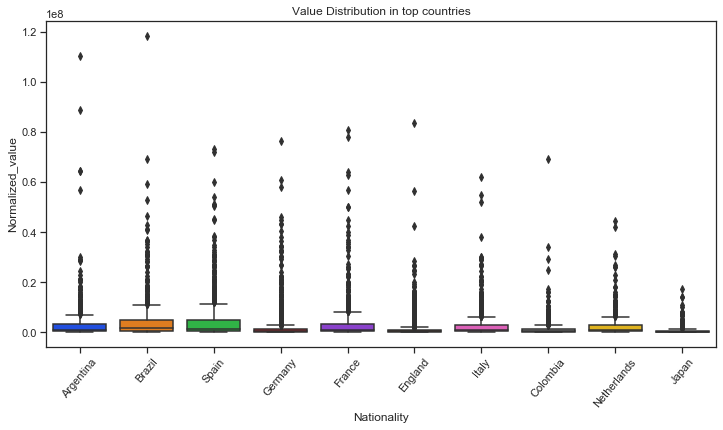

In [47]:
# Every Nations' Player and their wages

df_country_age = df.loc[data['Nationality'].isin(top_countries_name) & df['Normalized_value']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x='Nationality' ,y='Normalized_value' , data = df_country_age)
plt.title('Value Distribution in top countries')
plt.xticks(rotation = 50)
plt.show()

we can see that players in argentina,braziland european countries have higher values than usual this is because most of them star players like messi , neymar and ramos

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

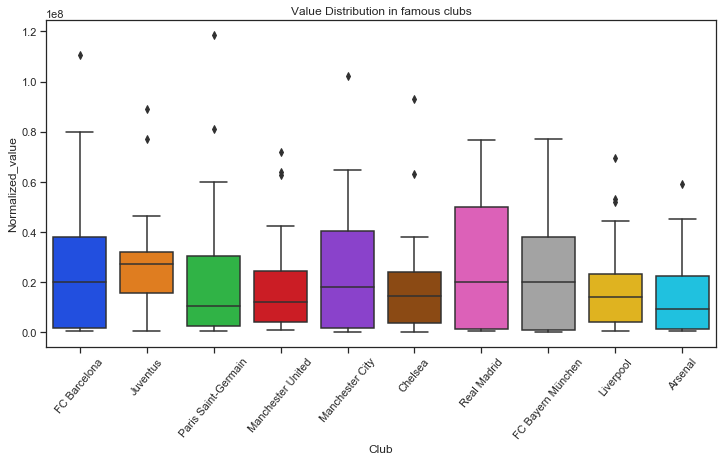

In [48]:
df_club_age = df.loc[df['Club'].isin(clubs) & df['Normalized_value']]
plt.figure(1 , figsize = (12,6))
sns.boxplot(x = 'Club', y = 'Normalized_value' , data = df_club_age)
plt.title('Value Distribution in famous clubs')
plt.xticks(rotation = 50)
plt.show()

we can see one player in barcelona has higher value than usual and it is the one and only MESSI.

### CHECKING RELATION BETWEEN JERSEY NUMBER, OVERALL AND VALUE

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

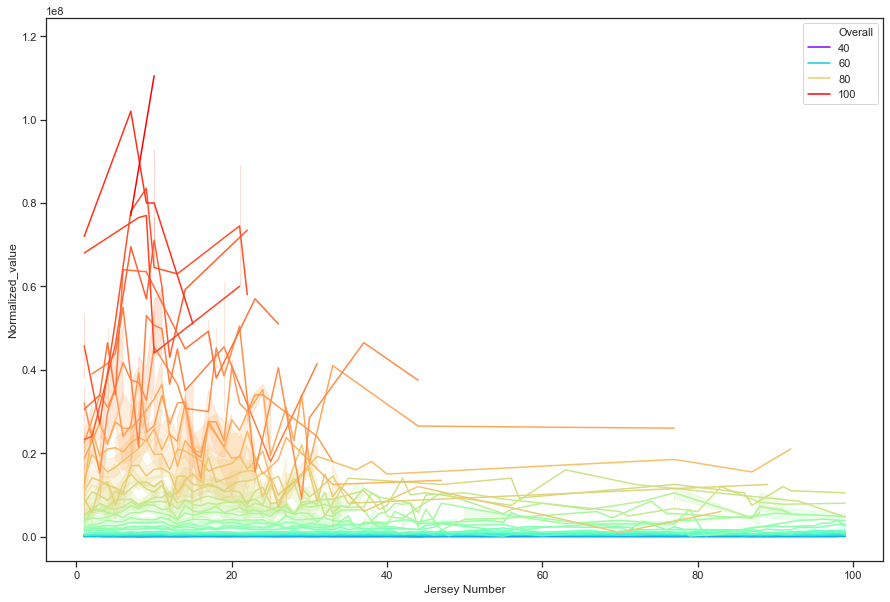

In [49]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Jersey Number',y='Normalized_value',data=df,hue='Overall',palette = 'rainbow')

from the graph above we can say that players with high overall and high values usually have jersey numbers between 1-10.

### CHECKING RELATION BETWEEN INTERNATIONAL REPUTATION, VALUE AND OVERALL

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

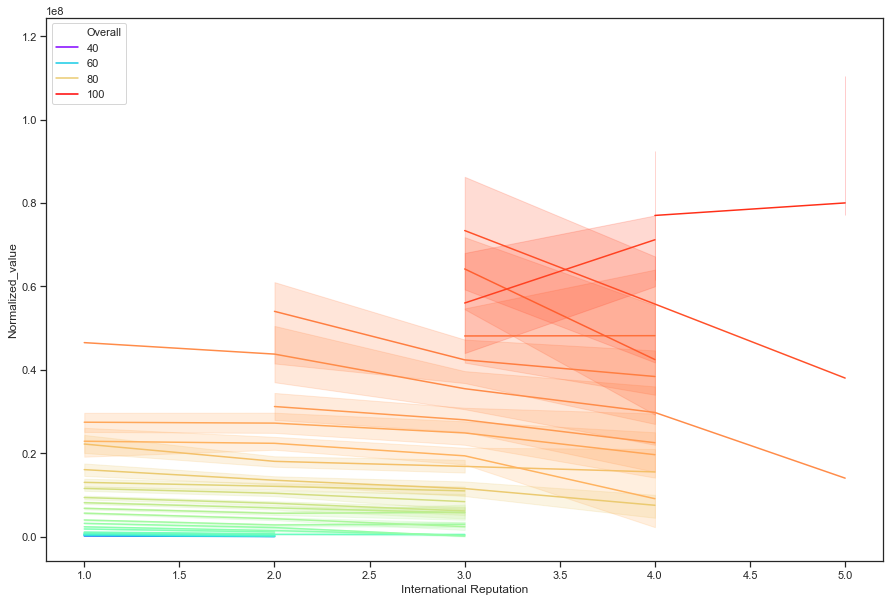

In [50]:
plt.figure(figsize=(15,10))
sns.lineplot(x='International Reputation',y='Normalized_value',data=df,hue='Overall',palette = 'rainbow')

so from the graph we can tell that people with high overall and high value are usually internationaly reputed players.

### CHECKING SOME COOL FACTS IN THE GAME

finding 15 youngest Players from the dataset


In [51]:
youngest = data.sort_values('Age', ascending = True)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(youngest)

                 Name  Age               Club          Nationality
18206       G. Nugent   16    Tranmere Rovers              England
17743       J. Olstad   16    Sarpsborg 08 FF               Norway
13293     H. Massengo   16          AS Monaco               France
16081     J. Italiano   16        Perth Glory            Australia
18166        N. Ayéva   16          Örebro SK               Sweden
17712        K. Broda   16       Wisła Kraków               Poland
17354     L. D'Arrigo   16    Adelaide United            Australia
13567  Y. Verschaeren   16     RSC Anderlecht              Belgium
16927       B. Nygren   16       IFK Göteborg               Sweden
18018     B. O'Gorman   16     Bray Wanderers  Republic of Ireland
17091        A. Doğan   16        Kayserispor               Turkey
17115      C. Bassett   16    Colorado Rapids        United States
15793        J. Lahne   16  IF Brommapojkarna               Sweden
15746     Y. Begraoui   16         AJ Auxerre               Fr

finding 15 eldest players from the dataset


In [52]:

eldest = data.sort_values('Age', ascending = False)[['Name', 'Age', 'Club', 'Nationality']].head(15)
print(eldest)

                  Name  Age                          Club        Nationality
4741          O. Pérez   45                       Pachuca             Mexico
18183    K. Pilkington   44              Cambridge United            England
17726        T. Warner   44            Accrington Stanley  Trinidad & Tobago
10545      S. Narazaki   42                Nagoya Grampus              Japan
7225          C. Muñoz   41  CD Universidad de Concepción          Argentina
1120         J. Villar   41                       No Club           Paraguay
12192     H. Sulaimani   41                     Ohod Club       Saudi Arabia
15426         M. Tyler   41           Peterborough United            England
4228          B. Nivet   41                  ESTAC Troyes             France
10356         F. Kippe   40                 Lillestrøm SK             Norway
16264  P. van der Vlag   40                      FC Emmen        Netherlands
9484       B. Castillo   40                Atlético Huila           Colombia

best in different aspects

In [53]:
pr_cols=['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing', 'Volleys',
       'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing', 'BallControl',
       'Acceleration', 'SprintSpeed', 'Agility', 'Reactions', 'Balance',
       'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
       'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
       'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
       'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes']
print('BEST IN DIFFERENT ASPECTS :')
print('_________________________\n\n')
i=0
while i < len(pr_cols):
    print('Best {0} : {1}'.format(pr_cols[i],df.loc[df[pr_cols[i]].idxmax()][1]))
    i += 1

BEST IN DIFFERENT ASPECTS :
_________________________


Best Crossing : K. De Bruyne
Best Finishing : L. Messi
Best HeadingAccuracy : Naldo
Best ShortPassing : L. Modrić
Best Volleys : E. Cavani
Best Dribbling : L. Messi
Best Curve : Quaresma
Best FKAccuracy : L. Messi
Best LongPassing : T. Kroos
Best BallControl : L. Messi
Best Acceleration : Douglas Costa
Best SprintSpeed : K. Mbappé
Best Agility : Neymar Jr
Best Reactions : Cristiano Ronaldo
Best Balance : Bernard
Best ShotPower : Cristiano Ronaldo
Best Jumping : Cristiano Ronaldo
Best Stamina : N. Kanté
Best Strength : A. Akinfenwa
Best LongShots : L. Messi
Best Aggression : B. Pearson
Best Interceptions : N. Kanté
Best Positioning : Cristiano Ronaldo
Best Vision : L. Messi
Best Penalties : M. Balotelli
Best Composure : L. Messi
Best Marking : A. Barzagli
Best StandingTackle : G. Chiellini
Best SlidingTackle : Sergio Ramos
Best GKDiving : De Gea
Best GKHandling : J. Oblak
Best GKKicking : M. Neuer
Best GKPositioning : G. Buffon
Bes

maximum potential and performance

In [54]:
print('Maximum Potential : '+str(df.loc[df['Potential'].idxmax()][1]))
print('Maximum Overall Perforamnce : '+str(df.loc[df['Overall'].idxmax()][1]))

Maximum Potential : K. Mbappé
Maximum Overall Perforamnce : L. Messi


longest member in the team

In [55]:
import datetime

now = datetime.datetime.now()
data['Join_year'] = data.Joined.dropna().map(lambda x: x.split(',')[1].split(' ')[1])
data['Years_of_member'] = (data.Join_year.dropna().map(lambda x: now.year - int(x))).astype('int')
membership = data[['Name', 'Club', 'Years_of_member']].sort_values(by = 'Years_of_member', ascending = False).head(10)
membership.set_index('Name', inplace=True)
membership

Club  Years_of_member
Name                                            
O. Pérez                Pachuca               29
M. Al Shalhoub         Al Hilal               22
H. Sogahata     Kashima Antlers               22
M. Ogasawara    Kashima Antlers               22
S. Narazaki      Nagoya Grampus               21
M. Wölfli        BSC Young Boys               20
K. Kitamoto         Vissel Kobe               20
C. Källqvist          BK Häcken               19
Y. Endo             Gamba Osaka               19
S. Pellissier     Chievo Verona               18

top 10 left footed 

In [56]:
data[data['Preferred Foot'] == 'Left'][['Name', 'Age', 'Club', 'Nationality']].head(10)

Name  Age               Club Nationality
0       L. Messi   31       FC Barcelona   Argentina
13   David Silva   32    Manchester City       Spain
15     P. Dybala   24           Juventus   Argentina
17  A. Griezmann   27    Atlético Madrid      France
19   T. Courtois   26        Real Madrid     Belgium
24  G. Chiellini   33           Juventus       Italy
26      M. Salah   26          Liverpool       Egypt
28  J. Rodríguez   26  FC Bayern München    Colombia
35       Marcelo   30        Real Madrid      Brazil
36       G. Bale   28        Real Madrid       Wales

 top 10 Right footed footballers

In [57]:
data[data['Preferred Foot'] == 'Right'][['Name', 'Age', 'Club', 'Nationality']].head(10)

Name  Age                 Club Nationality
1   Cristiano Ronaldo   33             Juventus    Portugal
2           Neymar Jr   26  Paris Saint-Germain      Brazil
3              De Gea   27    Manchester United       Spain
4        K. De Bruyne   27      Manchester City     Belgium
5           E. Hazard   27              Chelsea     Belgium
6           L. Modrić   32          Real Madrid     Croatia
7           L. Suárez   31         FC Barcelona     Uruguay
8        Sergio Ramos   32          Real Madrid       Spain
9            J. Oblak   25      Atlético Madrid    Slovenia
10     R. Lewandowski   29    FC Bayern München      Poland

best players from each positions with their age, nationality, club based on their potential scores


In [60]:
data.iloc[data.groupby(data['Position'])['Potential'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

Position                 Name  Age                     Club Nationality
31       CAM           C. Eriksen   26        Tottenham Hotspur     Denmark
42        CB            S. Umtiti   24             FC Barcelona      France
27       CDM             Casemiro   26              Real Madrid      Brazil
350       CF             A. Milik   24                   Napoli      Poland
78        CM  S. Milinković-Savić   23                    Lazio      Serbia
3         GK               De Gea   27        Manchester United       Spain
28       LAM         J. Rodríguez   26        FC Bayern München    Colombia
35        LB              Marcelo   30              Real Madrid      Brazil
77       LCB          M. Škriniar   23                    Inter    Slovakia
11       LCM             T. Kroos   28              Real Madrid     Germany
14       LDM             N. Kanté   27                  Chelsea      France
15        LF            P. Dybala   24                 Juventus   Argentina
415       LM             H. Aouar   20       Olympique Lyonnais      France
21        LS            E. Cavani   31      Paris Saint-Germain     Uruguay
2         LW            Neymar Jr   26      Paris Saint-Germain      Brazil
601      LWB                Jonny   24  Wolverhampton Wanderers       Spain
171      RAM            H. Ziyech   25                     Ajax     Morocco
247       RB         João Cancelo   24                 Juventus    Portugal
8        RCB         Sergio Ramos   32              Real Madrid       Spain
4        RCM         K. De Bruyne   27          Manchester City     Belgium
45       RDM             P. Pogba   25        Manchester United      France
0         RF             L. Messi   31             FC Barcelona   Argentina
25        RM            K. Mbappé   19      Paris Saint-Germain      France
7         RS            L. Suárez   31             FC Barcelona     Uruguay
79        RW        Marco Asensio   22              Real Madrid       Spain
766      RWB         Pablo Maffeo   20            VfB Stuttgart       Spain
1         ST    Cristiano Ronaldo   33                 Juventus    Portugal

best players per each position with their age, club, and nationality based on their overall scores


In [59]:
df.iloc[df.groupby(data['Position'])['Overall'].idxmax()][['Position', 'Name', 'Age', 'Club', 'Nationality']]

Position               Name  Age                      Club Nationality
17       CAM       A. Griezmann   27           Atlético Madrid      France
12        CB           D. Godín   32           Atlético Madrid     Uruguay
20       CDM    Sergio Busquets   29              FC Barcelona       Spain
271       CF       Luis Alberto   25                     Lazio       Spain
67        CM             Thiago   27         FC Bayern München       Spain
3         GK             De Gea   27         Manchester United       Spain
28       LAM       J. Rodríguez   26         FC Bayern München    Colombia
35        LB            Marcelo   30               Real Madrid      Brazil
24       LCB       G. Chiellini   33                  Juventus       Italy
11       LCM           T. Kroos   28               Real Madrid     Germany
14       LDM           N. Kanté   27                   Chelsea      France
5         LF          E. Hazard   27                   Chelsea     Belgium
33        LM      P. Aubameyang   29                   Arsenal       Gabon
21        LS          E. Cavani   31       Paris Saint-Germain     Uruguay
2         LW          Neymar Jr   26       Paris Saint-Germain      Brazil
474      LWB          N. Schulz   25       TSG 1899 Hoffenheim     Germany
129      RAM        J. Cuadrado   30                  Juventus    Colombia
69        RB        Azpilicueta   28                   Chelsea       Spain
8        RCB       Sergio Ramos   32               Real Madrid       Spain
4        RCM       K. De Bruyne   27           Manchester City     Belgium
45       RDM           P. Pogba   25         Manchester United      France
0         RF           L. Messi   31              FC Barcelona   Argentina
25        RM          K. Mbappé   19       Paris Saint-Germain      France
7         RS          L. Suárez   31              FC Barcelona     Uruguay
56        RW     Bernardo Silva   23           Manchester City    Portugal
450      RWB          M. Ginter   24  Borussia Mönchengladbach     Germany
1         ST  Cristiano Ronaldo   33                  Juventus    Portugal